In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import scipy as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("zomato.csv")

In [3]:
df2 = pd.read_csv('Country_Code.csv')

In [4]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# Merging two different datasets

In [6]:
data = pd.merge (df1,df2, on = 'Country Code')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# A) Prediction of Average Cost for two

# Exploratory Data Analysis (EDA)

In [7]:
data.shape

(9551, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [10]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Columns (Has Table booking, Has Online delivery, Is delivering now, Switch to order menu) have only one or two unique value, so we can drop these columns.

In [11]:
data.drop(columns=[ 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu'],axis=1,inplace=True)

In [12]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [13]:
data.drop(columns=['Restaurant ID', 'Restaurant Name'],axis=1,inplace=True)

In [14]:
data.nunique()

Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [15]:
data.isnull().sum()

Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

9 null value present in 'Cuisines' column , Replacing the null value by its mode

In [16]:
data["Cuisines"] = data["Cuisines"].fillna(data["Cuisines"].mode()[0])

In [17]:
data.isnull().sum()

Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

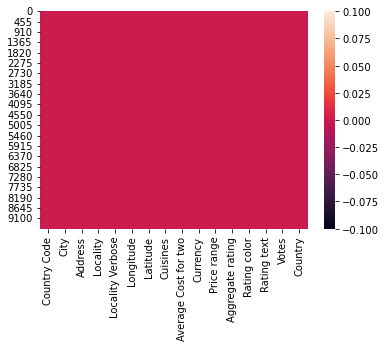

In [18]:
sns.heatmap(data.isnull())

Now no null values are present.

# Statistical Description

In [19]:
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [20]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text', 'Country']


In [21]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


# Checking Skewness

In [22]:
data.skew()

Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

# VISUALIZATION


Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


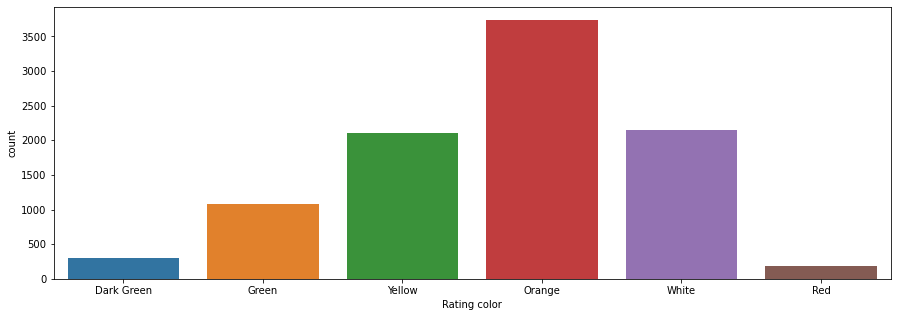

In [23]:
#types of Rating color
print(data["Rating color"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["Rating color"])
plt.show()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


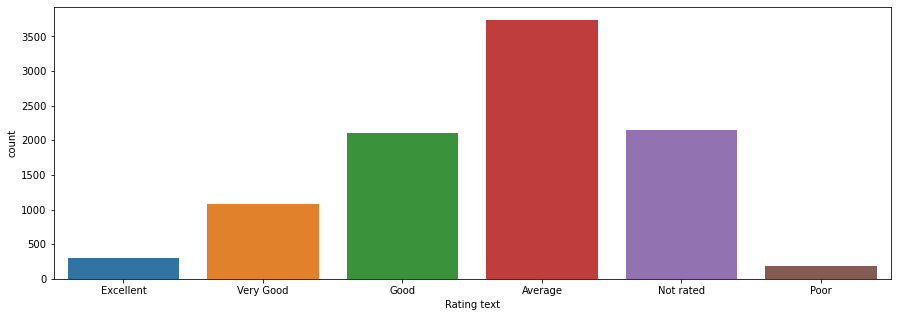

In [24]:
#types of Rating text
print(data["Rating text"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["Rating text"])
plt.show()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


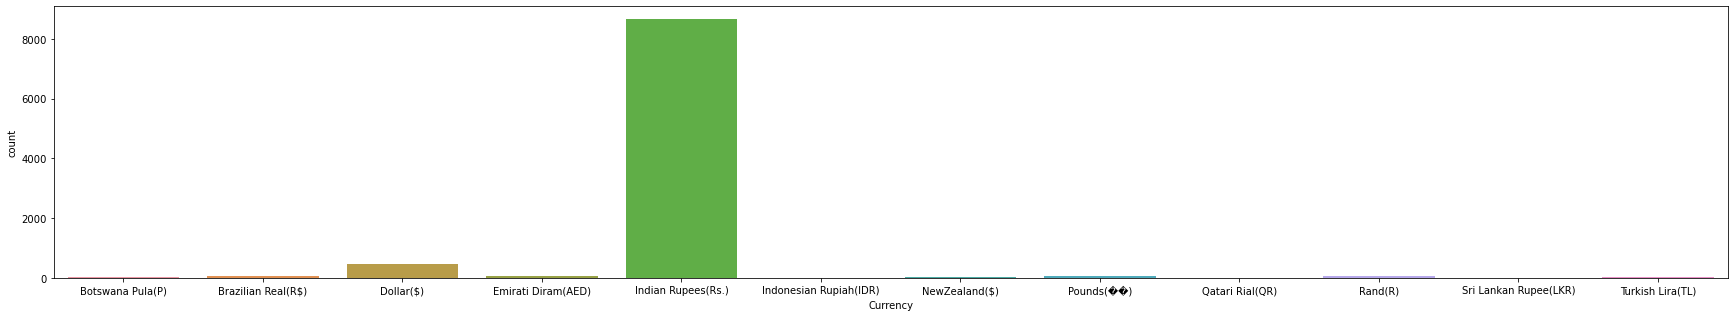

In [29]:
#types of Currency
print(data["Currency"].value_counts())
plt.figure(figsize=(30,5))
sns.countplot(data["Currency"])
plt.show()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


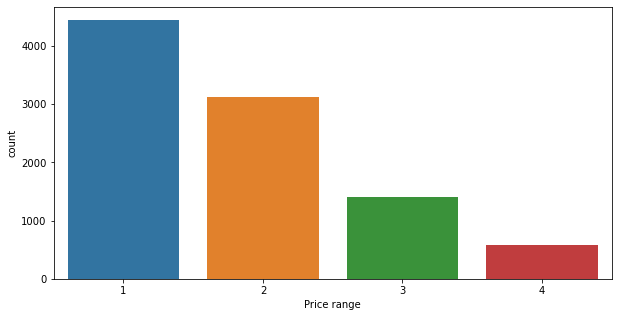

In [27]:
#types of Price range 
print(data["Price range"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data["Price range"])
plt.show()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


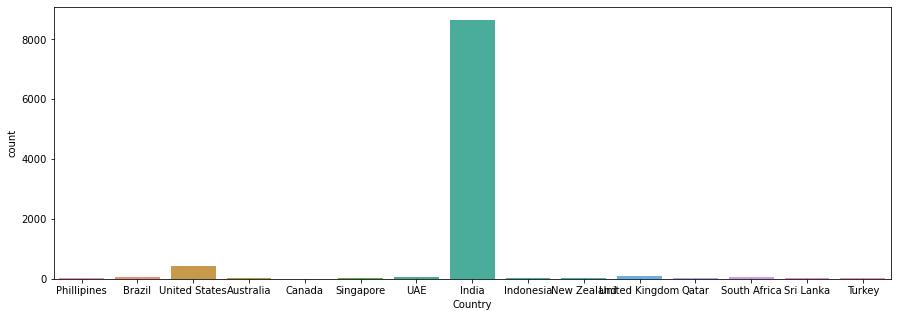

In [30]:
#types of Country
print(data["Country"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["Country"])
plt.show()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


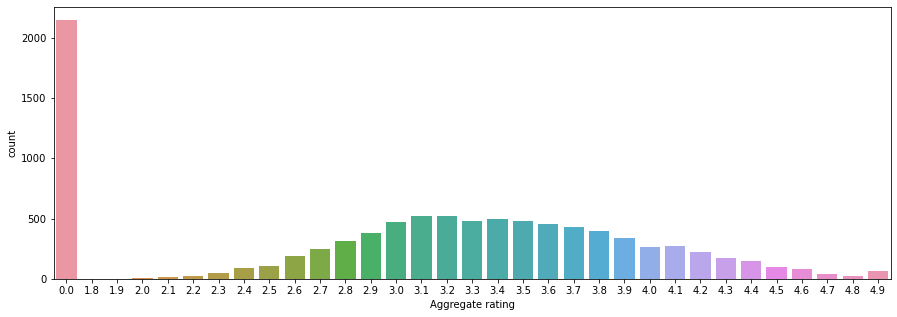

In [31]:
#types of Aggregate rating
print(data["Aggregate rating"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["Aggregate rating"])
plt.show()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


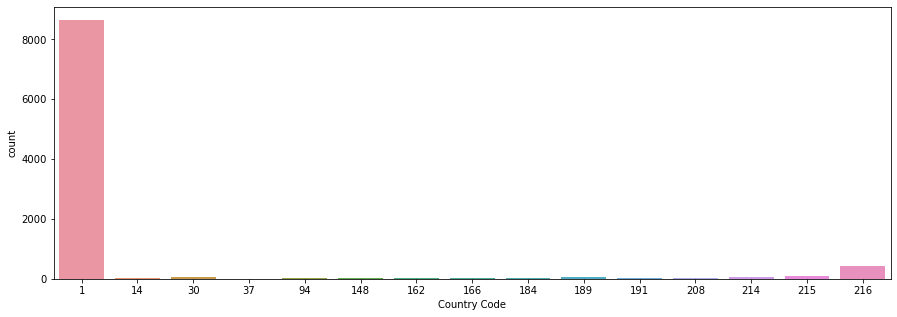

In [32]:
#types of Country Code
print(data["Country Code"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["Country Code"])
plt.show()

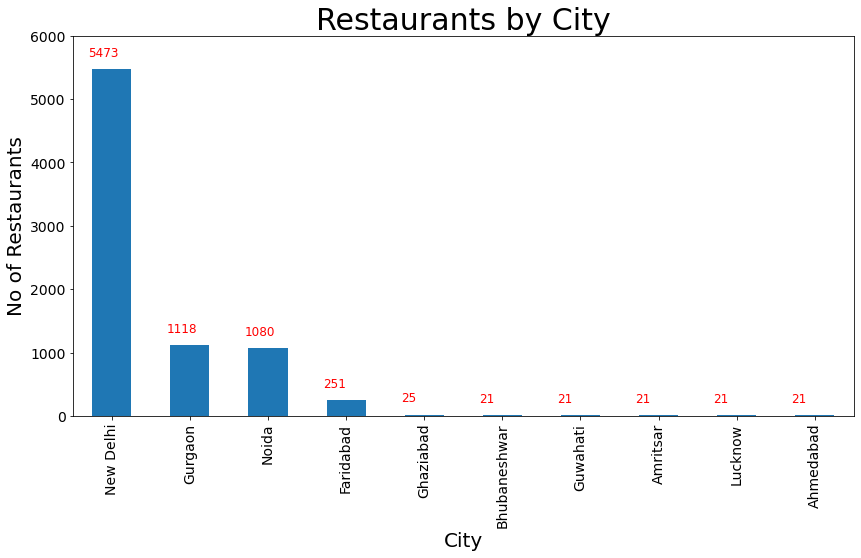

In [33]:
#maximum number of Restaurents in city
city = data['City'].value_counts(ascending = False)[:10]
city.plot(kind = 'bar', figsize = (14,7), fontsize = 14)
#city.plot.bar(figsize=(14, 7),fontsize=14)
plt.title('Restaurants by City', fontsize=30)                                             
plt.xlabel('City', fontsize=20)
plt.ylabel('No of Restaurants', fontsize=20)
plt.ylim(0,6000)
for idx, val in enumerate(data['City'].value_counts()[:10]):
    plt.text(x = idx - 0.3, y = val + 200 , s = val, color = 'red', fontsize = 12)
plt.show()

In [34]:
#top cuisines on Zomato
cuisine_count = []

for v in data['Cuisines'].values:
    if isinstance (v, str):
        cus = v.split(',')
    for c in cus:
        cuisine_count.append(c.strip())

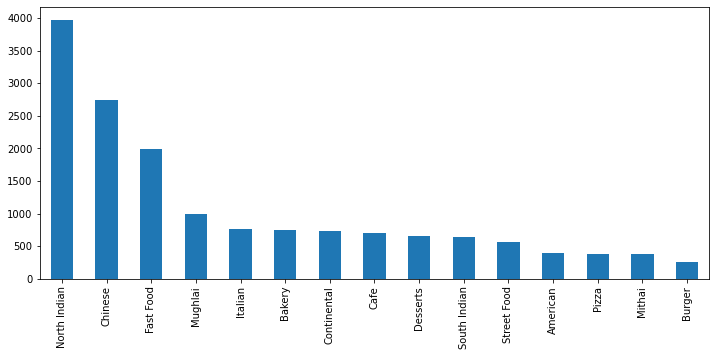

In [35]:
pd.Series(cuisine_count).value_counts()[:15].plot(kind = 'bar', figsize = (12,5))
plt.show()


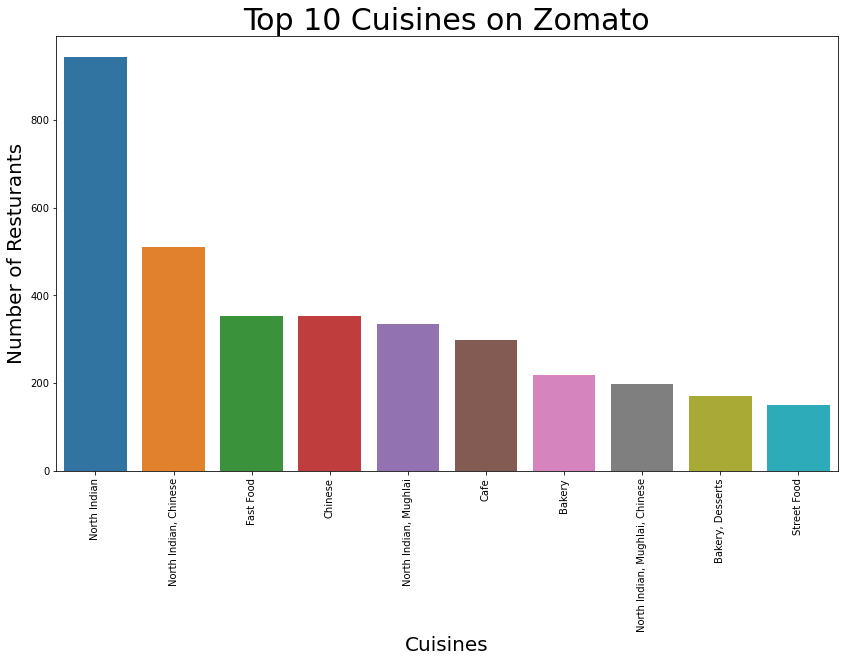

In [37]:
plt.figure(figsize = (14,8))
sns.barplot(data['Cuisines'].value_counts()[:10].index,data['Cuisines'].value_counts()[:10])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 10 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

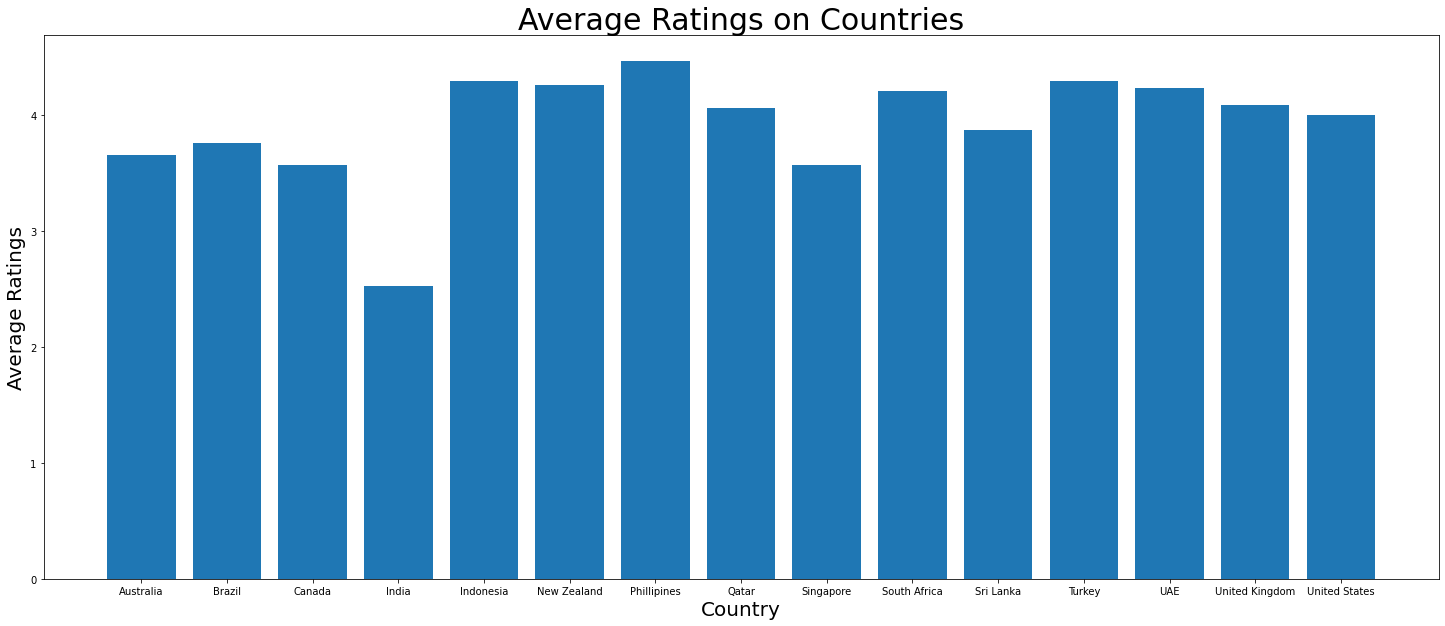

In [38]:
#Average Ratings on Countries
country_average = data.groupby('Country')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(25,10))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Average Ratings', fontsize=20)
plt.title('Average Ratings on Countries', fontsize=30)
plt.bar(country_average['Country'], country_average['Aggregate rating'])
plt.show()

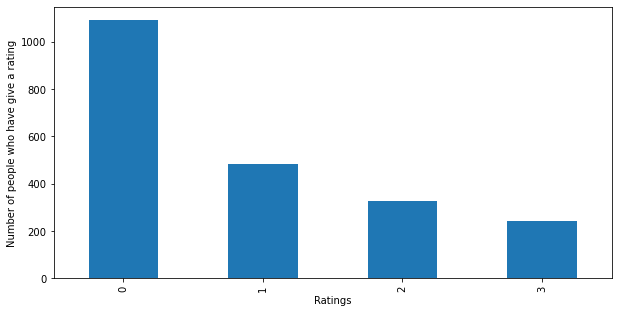

In [40]:
#Checking the rating text and votes of the restaurants
data[data['Aggregate rating'] == 0]['Votes'].value_counts().plot(kind = 'bar',figsize =(10,5))
plt.xlabel('Ratings')
plt.ylabel('Number of people who have give a rating')
plt.show()

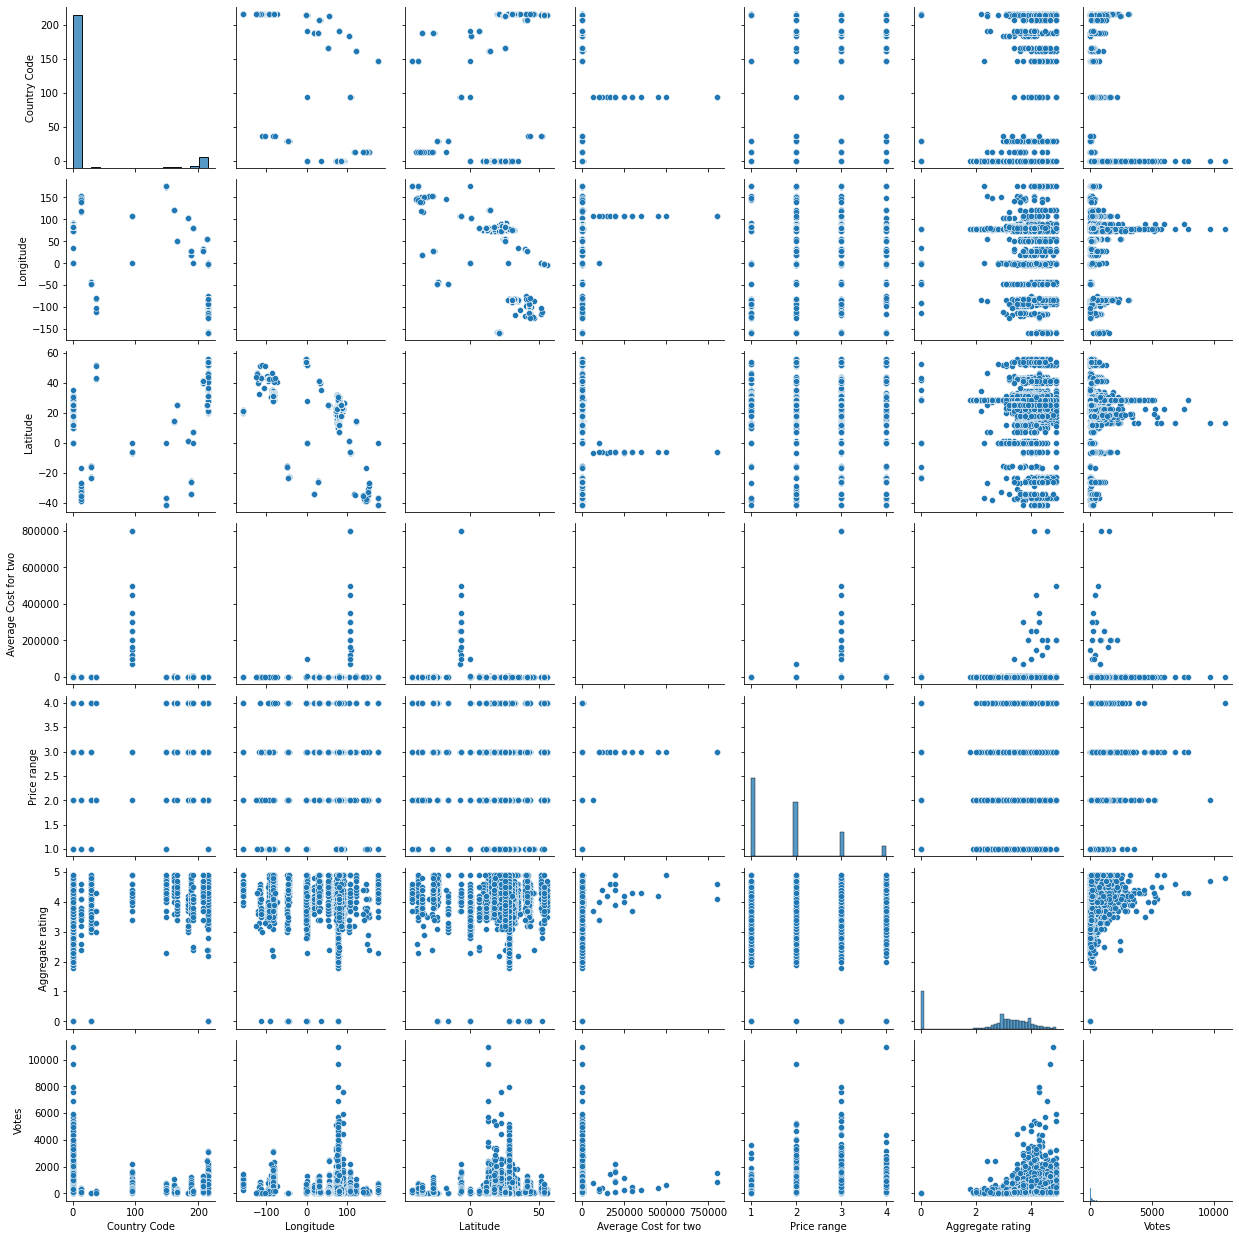

In [41]:
# Checking the pairwise relation between the features.
sns.pairplot(data)

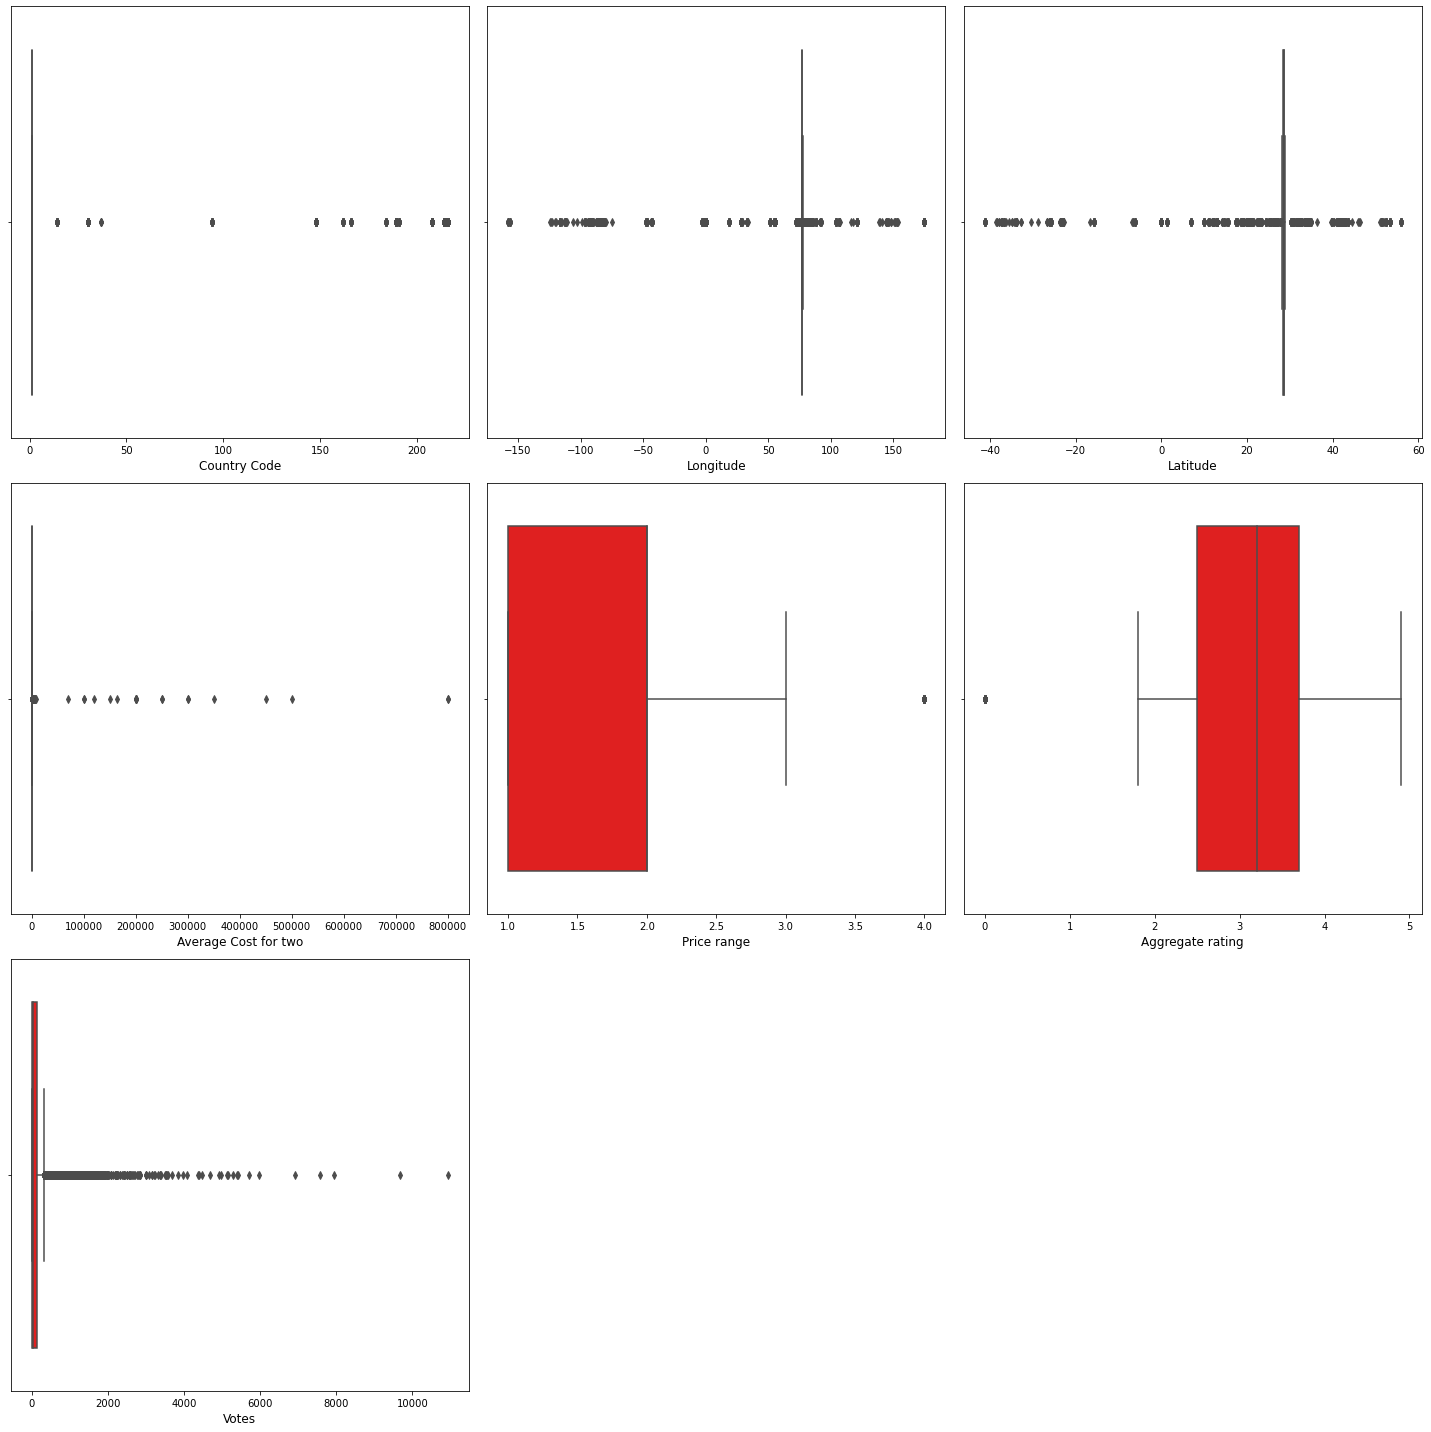

In [42]:
#Checking outliers
#outliers present in numerical columns

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [43]:
#Removing outliers by Zscore 

features = data[['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]

z=np.abs(zscore(features))

z

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,2.531111,1.372269,1.025581,0.006154,1.319803,1.407131,0.365202
1,2.531111,1.371945,1.026647,0.000049,1.319803,1.209281,1.009168
2,2.531111,1.372975,1.024131,0.173743,2.424090,1.143331,0.262911
3,2.531111,1.372966,1.023775,0.018659,2.424090,1.473081,0.483766
4,2.531111,1.372991,1.023854,0.018659,2.424090,1.407131,0.167595
...,...,...,...,...,...,...,...
9546,3.341718,0.847685,1.378025,0.069428,1.319803,0.945480,1.467151
9547,3.341718,0.846144,1.376849,0.067878,1.319803,1.011430,2.039049
9548,3.341718,0.846305,1.381025,0.063845,2.424090,0.681680,1.171903
9549,3.341718,0.846272,1.381221,0.066947,2.424090,0.879530,1.729853


In [44]:
new_df = data[(z<3).all(axis=1)] 
new_df

,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,166,Doha,"2nd Floor, The Gate Mall, Dafna, Doha","The Gate, Dafna","The Gate, Dafna, Doha",51.526653,25.323261,"European, Arabian, Japanese, Bakery, Desserts",200,Qatari Rial(QR),4,3.9,Yellow,Good,197,Qatar
9433,166,Doha,"1st Floor, The St. Regis Hotel, Westbay, Doha","The St. Regis, Westbay","The St. Regis, Westbay, Doha",51.530127,25.350325,International,550,Qatari Rial(QR),4,4.4,Green,Very Good,67,Qatar
9434,166,Doha,"Ground Floor, The Westin Doha Hotel & Spa, Fer...","The Westin Doha Hotel & Spa, Fereej Bin Mahmoud","The Westin Doha Hotel & Spa, Fereej Bin Mahmou...",51.512909,25.276180,Thai,445,Qatari Rial(QR),4,4.3,Green,Very Good,73,Qatar
9435,166,Doha,"Beside Jarir Bookstore, Jaidah Square, Al Mata...",Umm Ghuwailina,"Umm Ghuwailina, Doha",51.544576,25.273020,Italian,400,Qatari Rial(QR),4,4.5,Dark Green,Excellent,145,Qatar


In [45]:
data.shape

(9551, 16)

In [46]:
(9551-8565)/9551*100

10.323526332321222

In [47]:
#Encoding the categorical columns using Label Encoding
categorical_col = ['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text', 'Country']
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,City,Address,Locality,Locality Verbose,Cuisines,Currency,Rating color,Rating text,Country
0,27,7731,98,99,657,0,0,1,2
1,27,5244,376,384,783,0,0,1,2
2,28,3955,185,191,1271,0,1,5,2
3,28,7736,549,562,794,0,0,1,2
4,28,7735,549,562,793,0,0,1,2
...,...,...,...,...,...,...,...,...,...
9432,13,1344,717,770,552,4,5,2,3
9433,13,835,736,789,718,4,1,5,3
9434,13,4700,742,795,1364,4,1,5,3
9435,13,3211,759,814,719,4,0,1,3


# Skewness

In [48]:
# Checking the skewness
new_df.skew()

Country Code            11.593933
City                    -1.381151
Address                 -0.037898
Locality                -0.175206
Locality Verbose        -0.072605
Longitude               -3.529965
Latitude                -3.180873
Cuisines                -0.262894
Average Cost for two     3.718671
Currency                -1.193208
Price range              1.029231
Aggregate rating        -0.877262
Rating color             0.092075
Rating text              0.431465
Votes                    3.653843
Country                 12.815549
dtype: float64

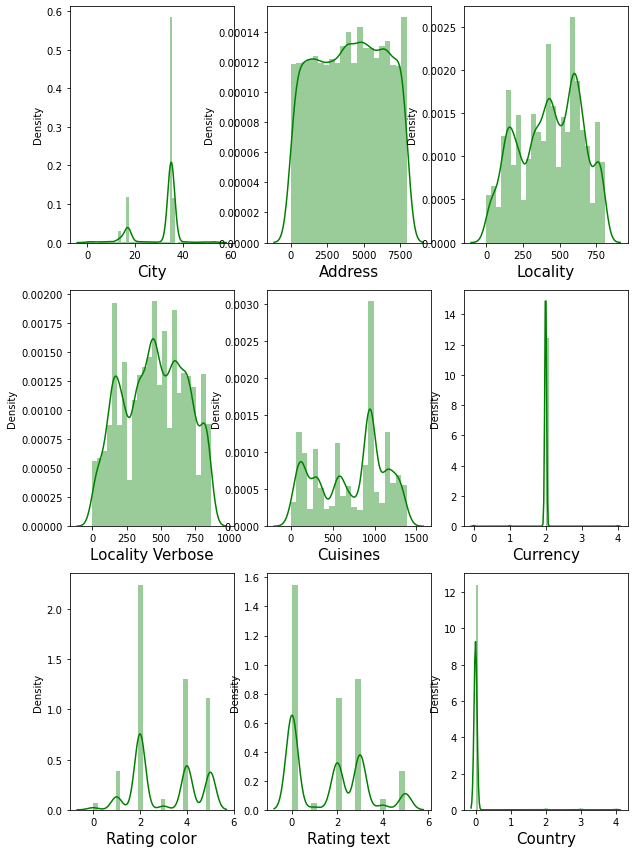

In [50]:
feat=new_df[['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text', 'Country']]
#Relationship Visualizing

plt.figure(figsize = (10,20))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

In [51]:
# Removing skewness using yeo-johnson  method 
skew = ['City', 'Currency', 'Country','Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [52]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,City,Currency,Country,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,-0.786853,-11.607791,11.616901,11.616899,7.096817,-2.870154,1.170136,1.385129,1.972392,1.410787
1,-0.786853,-11.607791,11.616901,11.616899,7.094048,-2.870996,1.291498,1.385129,1.649065,1.753948
2,-0.664984,-11.607791,11.616901,11.616899,7.102859,-2.869007,3.044151,1.744844,1.543945,1.329422
3,-0.664984,-11.607791,11.616901,11.616899,7.102785,-2.868725,1.605942,1.744844,2.082799,1.492117
4,-0.664984,-11.607791,11.616901,11.616899,7.102998,-2.868788,1.605942,1.744844,1.972392,1.240914


In [53]:
new_df[skew].skew()

City                    -0.126751
Currency                 3.913878
Country                 11.532839
Country Code            11.532839
Longitude               -0.249360
Latitude                -2.531937
Average Cost for two     0.044229
Price range              0.240185
Aggregate rating        -0.631024
Votes                   -0.008984
dtype: float64

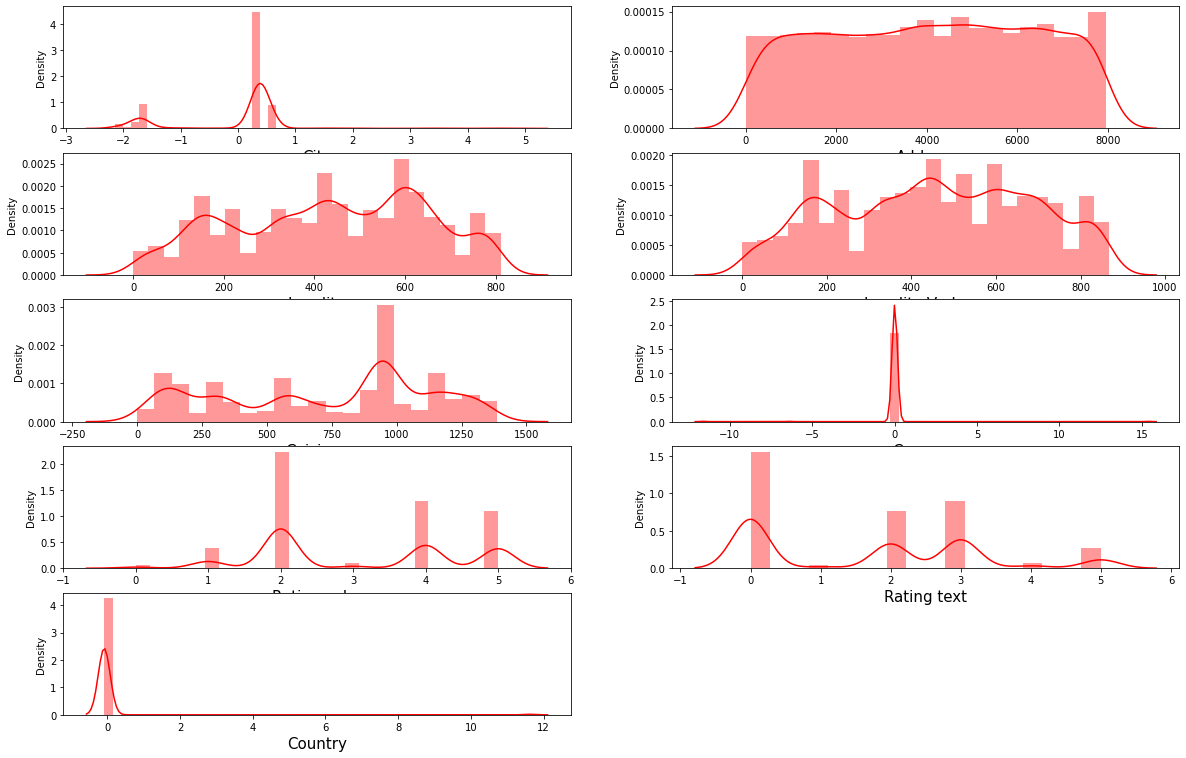

In [57]:
plt.figure(figsize = (20,40))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sns.distplot(new_df[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

In [58]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,0.077892,-0.021613,-0.028893,-0.028208,0.292598,-0.202920,-0.020096,-0.042949,-0.093251,0.134602,0.103545,-0.069728,0.037943,0.075480,1.000000
City,0.077892,1.000000,-0.101983,-0.035188,-0.038699,0.054168,-0.011449,0.017354,-0.078404,-0.163174,-0.076512,-0.065465,0.054944,-0.031722,-0.057002,0.077892
Address,-0.021613,-0.101983,1.000000,0.150581,0.152337,-0.024416,0.018040,-0.016180,0.007829,0.012146,-0.036925,-0.098629,0.056251,0.048478,-0.128155,-0.021613
Locality,-0.028893,-0.035188,0.150581,1.000000,0.999002,-0.026209,0.017092,-0.015087,-0.077867,-0.013412,-0.101930,-0.155147,0.006835,-0.000465,-0.178258,-0.028893
Locality Verbose,-0.028208,-0.038699,0.152337,0.999002,1.000000,-0.027072,0.016162,-0.016232,-0.075800,-0.011887,-0.099217,-0.153900,0.007440,0.001245,-0.176254,-0.028208
Longitude,0.292598,0.054168,-0.024416,-0.026209,-0.027072,1.000000,0.579900,0.004392,0.054889,-0.325947,0.075264,0.175121,-0.104827,-0.077165,0.186750,0.292598
Latitude,-0.202920,-0.011449,0.018040,0.017092,0.016162,0.579900,1.000000,0.038402,-0.028835,0.096092,-0.112352,-0.027884,-0.006377,-0.185071,-0.018102,-0.202920
Cuisines,-0.020096,0.017354,-0.016180,-0.015087,-0.016232,0.004392,0.038402,1.000000,-0.002544,0.028568,0.027467,-0.056096,-0.047689,-0.061127,-0.029703,-0.020096
Average Cost for two,-0.042949,-0.078404,0.007829,-0.077867,-0.075800,0.054889,-0.028835,-0.002544,1.000000,-0.060191,0.817347,0.409617,-0.074235,0.045261,0.505478,-0.042949
Currency,-0.093251,-0.163174,0.012146,-0.013412,-0.011887,-0.325947,0.096092,0.028568,-0.060191,1.000000,-0.010020,-0.015136,0.031253,0.005812,-0.010735,-0.093251


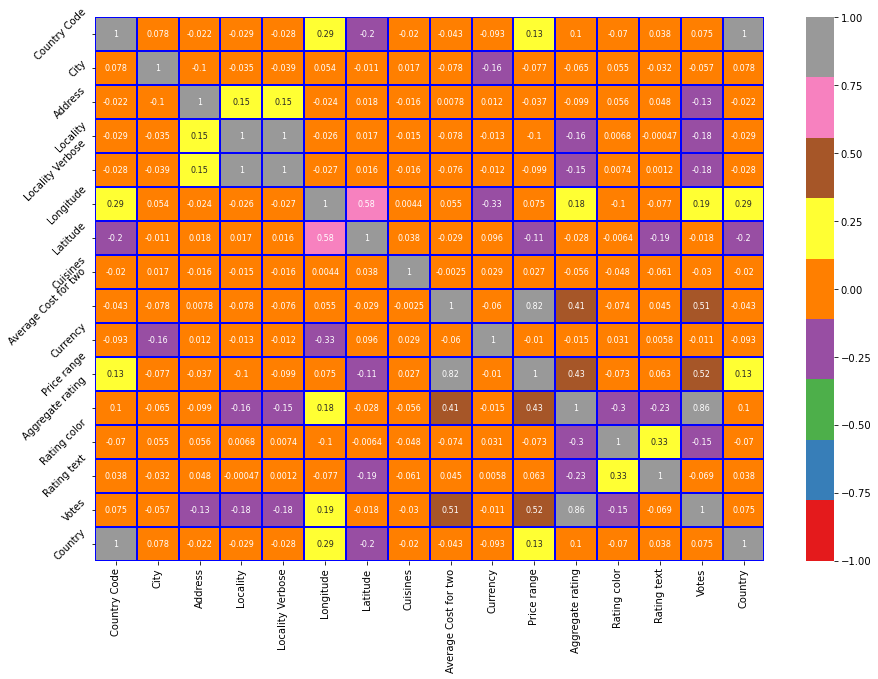

In [63]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="blue",annot_kws={'size':8},cmap="Set1")
plt.yticks(rotation=45);

Price range is highly positive correlated with 82%

In [64]:
#saving a Data Frame for Prediction for 'price range' as target variable
P_data=new_df

# Correlation between 'Average Cost for two' and features

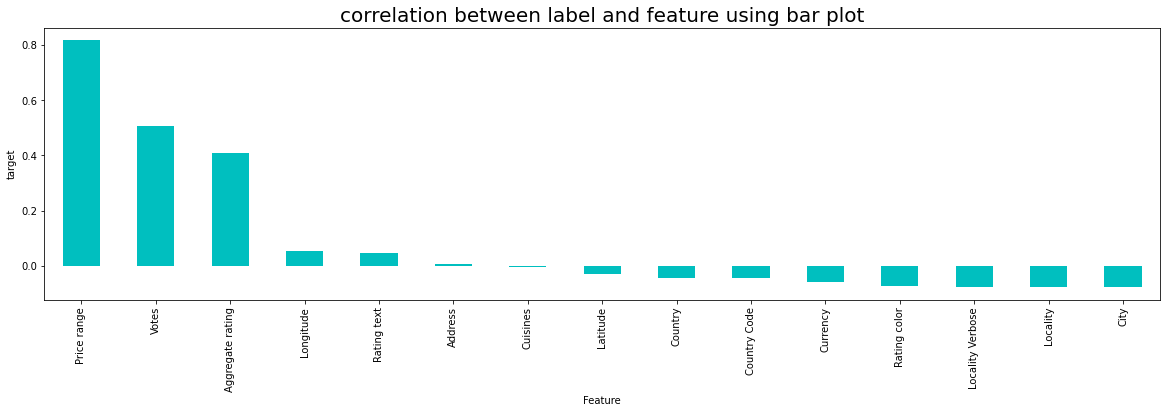

In [65]:
plt.figure(figsize=(20,5))
new_df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

very less relation between label and address, Cuisines,Latitude, dropping them.

In [66]:
new_df.drop('Address',axis=1,inplace=True)
new_df.drop('Latitude',axis=1,inplace=True)
new_df.drop('Cuisines',axis=1,inplace=True)

In [67]:
x=new_df.drop('Average Cost for two',axis=1)
y=new_df['Average Cost for two']


In [68]:
#Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Country Code,City,Locality,Locality Verbose,Longitude,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,11.616901,-0.786853,-1.603037,-1.570067,7.096817,-11.607791,1.385129,1.972392,-2.203028,-0.396310,1.410787,11.616901
1,11.616901,-0.786853,-0.280920,-0.312136,7.094048,-11.607791,1.385129,1.649065,-2.203028,-0.396310,1.753948,11.616901
2,11.616901,-0.664984,-1.189281,-1.163998,7.102859,-11.607791,1.744844,1.543945,-1.483690,2.085425,1.329422,11.616901
3,11.616901,-0.664984,0.541836,0.473520,7.102785,-11.607791,1.744844,2.082799,-2.203028,-0.396310,1.492117,11.616901
4,11.616901,-0.664984,0.541836,0.473520,7.102998,-11.607791,1.744844,1.972392,-2.203028,-0.396310,1.240914,11.616901
...,...,...,...,...,...,...,...,...,...,...,...,...
8560,11.616901,-1.902061,1.340813,1.391589,-2.075973,15.379166,1.744844,1.038603,1.393658,0.224124,1.160268,11.616901
8561,11.616901,-1.902061,1.431174,1.475451,-2.075747,15.379166,1.744844,1.543945,-1.483690,2.085425,0.590036,11.616901
8562,11.616901,-1.902061,1.459708,1.501934,-2.076865,15.379166,1.744844,1.440165,-1.483690,2.085425,0.634827,11.616901
8563,11.616901,-1.902061,1.540557,1.585796,-2.074809,15.379166,1.744844,1.649065,-2.203028,-0.396310,0.996808,11.616901


In [69]:
#Checking VIF(Variance Inflation Factor) values
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,inf,Country Code
1,1.056502,City
2,507.381147,Locality
3,507.095213,Locality Verbose
4,1.270040,Longitude
5,1.151244,Currency
6,1.426213,Price range
7,4.608487,Aggregate rating
8,1.227243,Rating color
9,1.235720,Rating text


droping the feature having high VIF value amongst all the columns.

In [70]:
x.drop(["Locality"],axis=1,inplace=True)
x.drop(["Country Code"],axis=1,inplace=True)
x.drop(["Country"],axis=1,inplace=True)

In [71]:
# checking VIF value to confirm the multicollinearity existance
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.044085,City
1,1.035882,Locality Verbose
2,1.172343,Longitude
3,1.150533,Currency
4,1.403168,Price range
5,4.569949,Aggregate rating
6,1.225097,Rating color
7,1.224380,Rating text
8,4.649817,Votes


# Model Building

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)


Maximum r2 score is  0.8040685626268309  on Random_state  92


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =maxRS)

In [74]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())



R2_Score: 0.8034843663662379
MAE: 0.33483857192839267
MSE: 0.2065581517625783
RMSE: 0.4544866904130178
-0.9633743803884727


In [75]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.6568027150122402
MAE: 0.4130284531940278
MSE: 0.3607356603959641
RMSE: 0.6006127374573105
-2.3858786944174


In [76]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7404418494926703
MAE: 0.37956640282703724
MSE: 0.27282232386470073
RMSE: 0.5223239644748274
0.6021990610569729


In [77]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.8129381398498873
MAE: 0.33097409772336317
MSE: 0.19662126306901023
RMSE: 0.4434199624160038
-1.3563858104377362


In [78]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.7860836889678443
MAE: 0.3446983780479177
MSE: 0.2248480541808637
RMSE: 0.47418145701921294
-1.2242622478111755


As per above analysis Random Forest Regressor is best fitting model. Now increase the accuracy of the model by Hyper Parameter Tuning 

# HYPERPARAMETR TUNING

In [79]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [80]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

In [81]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [82]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [83]:
Final_Model = RandomForestRegressor(**grid.best_params_)
Final_Model.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)

In [84]:
Regressor = Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
score=r2_score(y_test,pred)
print("R2_score",score*100)

R2_score 80.60893786857253


In [86]:
# Saving the model using .pkl

joblib.dump(Final_Model,"Zomato-Average Cost for two.pkl")

['Zomato-Average Cost for two.pkl']

In [87]:
# Loading the saved model
model=joblib.load("Zomato_Avg_cost_for_two.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([ 0.49471014,  0.2625469 ,  1.27759402, ..., -0.92483661,
        1.18204312, -0.64376198])

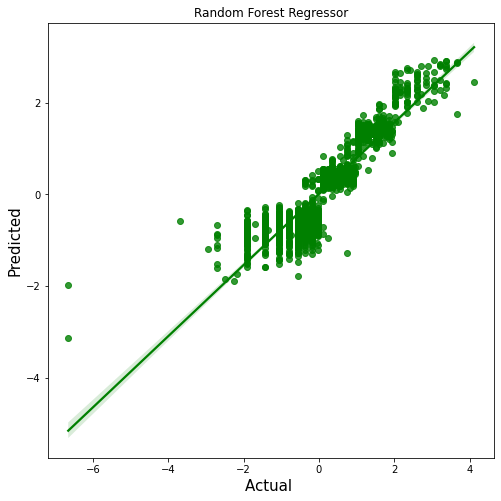

In [89]:
#Plotting for prediction
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='g')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

In [90]:
# Accuracy is almost 80% and predicated value is very close to actual value.

# B) Prediction of Price Range


In [91]:
#Correlation between the target variable and features using HEAT map
cor = P_data.corr()
cor

,Country Code,City,Locality,Locality Verbose,Longitude,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,0.077892,-0.028893,-0.028208,0.292598,-0.042949,-0.093251,0.134602,0.103545,-0.069728,0.037943,0.075480,1.000000
City,0.077892,1.000000,-0.035188,-0.038699,0.054168,-0.078404,-0.163174,-0.076512,-0.065465,0.054944,-0.031722,-0.057002,0.077892
Locality,-0.028893,-0.035188,1.000000,0.999002,-0.026209,-0.077867,-0.013412,-0.101930,-0.155147,0.006835,-0.000465,-0.178258,-0.028893
Locality Verbose,-0.028208,-0.038699,0.999002,1.000000,-0.027072,-0.075800,-0.011887,-0.099217,-0.153900,0.007440,0.001245,-0.176254,-0.028208
Longitude,0.292598,0.054168,-0.026209,-0.027072,1.000000,0.054889,-0.325947,0.075264,0.175121,-0.104827,-0.077165,0.186750,0.292598
Average Cost for two,-0.042949,-0.078404,-0.077867,-0.075800,0.054889,1.000000,-0.060191,0.817347,0.409617,-0.074235,0.045261,0.505478,-0.042949
Currency,-0.093251,-0.163174,-0.013412,-0.011887,-0.325947,-0.060191,1.000000,-0.010020,-0.015136,0.031253,0.005812,-0.010735,-0.093251
Price range,0.134602,-0.076512,-0.101930,-0.099217,0.075264,0.817347,-0.010020,1.000000,0.429224,-0.073294,0.062516,0.523711,0.134602
Aggregate rating,0.103545,-0.065465,-0.155147,-0.153900,0.175121,0.409617,-0.015136,0.429224,1.000000,-0.298292,-0.234622,0.857656,0.103545
Rating color,-0.069728,0.054944,0.006835,0.007440,-0.104827,-0.074235,0.031253,-0.073294,-0.298292,1.000000,0.325392,-0.152206,-0.069728


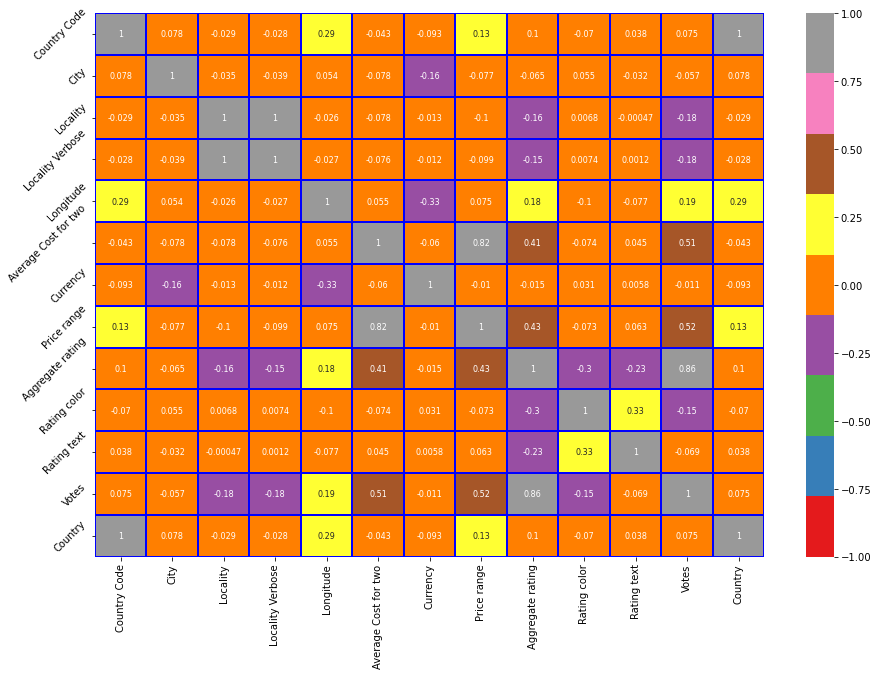

In [95]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="blue",annot_kws={'size':8},cmap="Set1")
plt.yticks(rotation=45);

Average Cost for two' is highly positive correlated with target variable 82%.

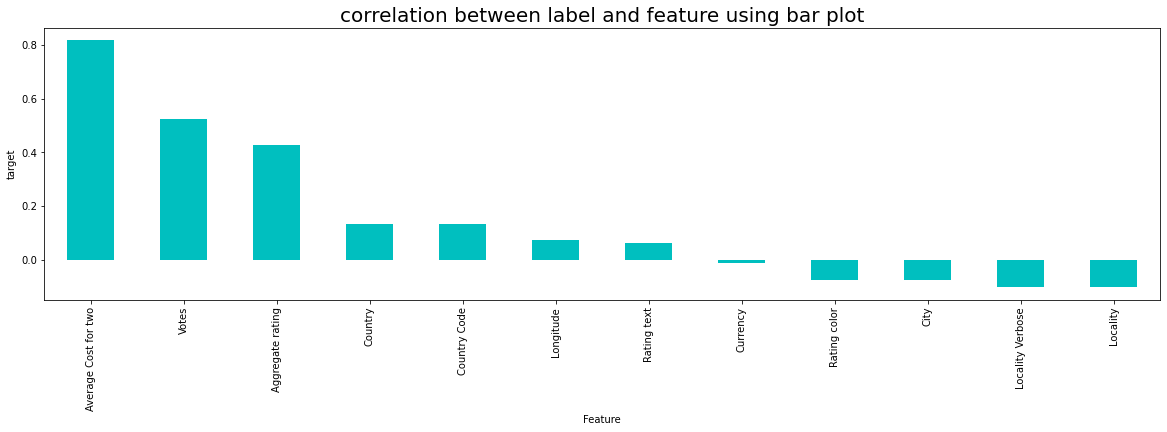

In [96]:
#Visualizing the correlation between 'Price range' and features
plt.figure(figsize=(20,5))
new_df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

label and Currency,Cuisines has not much relation so we can drop them

In [ ]:
P_data.drop('Currency',axis=1,inplace=True)


In [99]:
x=P_data.drop('Price range',axis=1)
y=P_data['Price range']
x.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Average Cost for two,Aggregate rating,Rating color,Rating text,Votes,Country
0,11.616899,-0.786853,98,99,7.096817,1.170136,1.972392,0,1,1.410787,11.616901
1,11.616899,-0.786853,376,384,7.094048,1.291498,1.649065,0,1,1.753948,11.616901
2,11.616899,-0.664984,185,191,7.102859,3.044151,1.543945,1,5,1.329422,11.616901
3,11.616899,-0.664984,549,562,7.102785,1.605942,2.082799,0,1,1.492117,11.616901
4,11.616899,-0.664984,549,562,7.102998,1.605942,1.972392,0,1,1.240914,11.616901


In [100]:
#Standard Scalarization
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Country Code,City,Locality,Locality Verbose,Longitude,Average Cost for two,Aggregate rating,Rating color,Rating text,Votes,Country
0,11.616901,-0.786853,-1.603037,-1.570067,7.096817,1.170136,1.972392,-2.203028,-0.396310,1.410787,11.616901
1,11.616901,-0.786853,-0.280920,-0.312136,7.094048,1.291498,1.649065,-2.203028,-0.396310,1.753948,11.616901
2,11.616901,-0.664984,-1.189281,-1.163998,7.102859,3.044151,1.543945,-1.483690,2.085425,1.329422,11.616901
3,11.616901,-0.664984,0.541836,0.473520,7.102785,1.605942,2.082799,-2.203028,-0.396310,1.492117,11.616901
4,11.616901,-0.664984,0.541836,0.473520,7.102998,1.605942,1.972392,-2.203028,-0.396310,1.240914,11.616901
...,...,...,...,...,...,...,...,...,...,...,...
8560,11.616901,-1.902061,1.340813,1.391589,-2.075973,-1.070567,1.038603,1.393658,0.224124,1.160268,11.616901
8561,11.616901,-1.902061,1.431174,1.475451,-2.075747,0.227962,1.543945,-1.483690,2.085425,0.590036,11.616901
8562,11.616901,-1.902061,1.459708,1.501934,-2.076865,-0.051401,1.440165,-1.483690,2.085425,0.634827,11.616901
8563,11.616901,-1.902061,1.540557,1.585796,-2.074809,-0.190489,1.649065,-2.203028,-0.396310,0.996808,11.616901


In [101]:
#Checking VIF(Variance Inflation Factor) values
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,inf,Country Code
1,1.030078,City
2,506.900770,Locality
3,506.656946,Locality Verbose
4,1.141061,Longitude
5,1.374777,Average Cost for two
6,4.607310,Aggregate rating
7,1.227796,Rating color
8,1.233408,Rating text
9,4.662677,Votes


Droping the feature having high VIF value among all the columns.

In [102]:
x.drop(["Locality"],axis=1,inplace=True)
x.drop(["Country Code"],axis=1,inplace=True)
x.drop(["Country"],axis=1,inplace=True)

In [103]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.019279,City
1,1.035511,Locality Verbose
2,1.051070,Longitude
3,1.363751,Average Cost for two
4,4.573183,Aggregate rating
5,1.224938,Rating color
6,1.217099,Rating text
7,4.653228,Votes


# Model Building

In [104]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9953202868653914  on Random_state  48


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [106]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.9952235134330346
MAE: 0.011641955623371548
MSE: 0.004737646858397624
RMSE: 0.06883056630885455
0.4212804767160109


In [107]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.9887848550532935
MAE: 0.011576990189396579
MSE: 0.011123949681071686
RMSE: 0.10547013644189376
0.32222056059878545


In [108]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.898978950998342
MAE: 0.1356361895289051
MSE: 0.10019960251637519
RMSE: 0.31654320797700775
0.8428246771503897


In [109]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.9917557031126901
MAE: 0.024872240178228092
MSE: 0.008177258891083951
RMSE: 0.09042819743356577
0.3537728985486363


In [110]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.9937970568480208
MAE: 0.012448491640646429
MSE: 0.0061525042988792595
RMSE: 0.07843790090816594
0.4325644431750691


 GradientBoosting Regressor is best fitting model as per analysis. Now increse the accuracy of the model by using hyper parameter tuning.




# HYPERPARAMETR TUNING

In [111]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [112]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [113]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'auto'}

In [114]:
Price_model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.1, loss= 'squared_error',max_features= 'sqrt')
Price_model.fit(x_train, y_train)
pred = Price_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.06883056630885455
R2_Score: 98.625054839511


In [116]:
# Saving the model using .pkl
joblib.dump(Price_model,"Zomato-Price Range Prediction.pkl")

['Zomato-Price Range Prediction.pkl']

In [118]:
# Loading the saved model
model=joblib.load("Zomato-Price Range Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,-0.961113,-0.961321
1,0.697684,0.630586
2,-0.961113,-0.960024
3,-0.961113,-0.941441
4,-0.961113,-0.966861
...,...,...
2565,1.385129,1.329964
2566,0.697684,0.765622
2567,-0.961113,-0.965983
2568,0.697684,0.665710


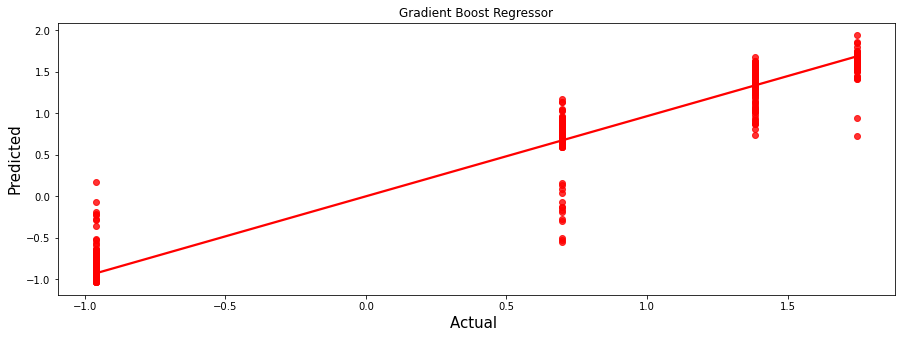

In [119]:
#Plotting the prediction
plt.figure(figsize=(15,5))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()

    A) Prediction of Average Cost for two, Accuracy is 80%
    B) Prediction of Price Range, Accuracy is 98.6%